In [2]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *

In [71]:
# keras API to organise data for you..
train_datagen = ImageDataGenerator(rescale=1./255) # rescale the image also
train_dir = r'C:\Users\44788\Desktop\CatsvsDogs\train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 23998 images belonging to 2 classes.


In [72]:
validation_datagen = ImageDataGenerator(rescale=1./255) # rescale the image also
validation_dir = r'C:\Users\44788\Desktop\CatsvsDogs\validation'
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1002 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255) # rescale the image also
test_dir = r'C:\Users\44788\Desktop\CatsvsDogs\test'
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150,150),
                                                   batch_size=1,
                                                   class_mode='binary')

#filenames = test_generator.filenames
#nb_samples = len(filenames)
#predict = model.predict_generator(test_generator,steps = nb_samples)

Found 9598 images belonging to 1 classes.


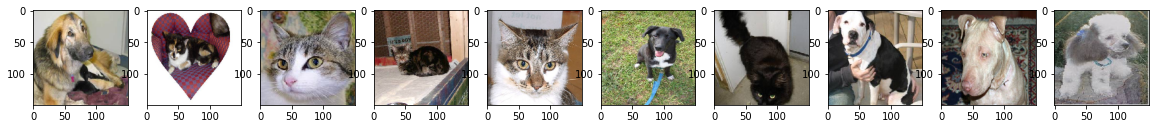

In [37]:
images = train_generator[1]
im = images[1]
fig, ax = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    im = images[0]
    ax[i].imshow(im[i])

In [73]:
model = Sequential([
    Conv2D(16, (3,3), kernel_regularizer=l2(0.001), activation='relu', input_shape=(150,150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [74]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['accuracy'])

In [75]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

checkpoint_path = r'C:\Users\44788\Desktop\CatsvsDogs\CvD.h5'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_accuracy',
                            verbose=0)

In [76]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50,
                    epochs=50,
                    validation_steps=50,
                    verbose=0,
                    callbacks=[checkpoint, early_stopping])

<AxesSubplot:>

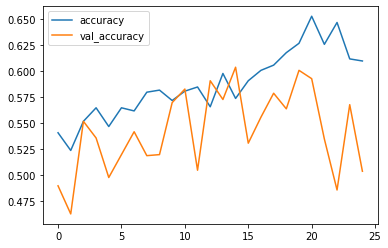

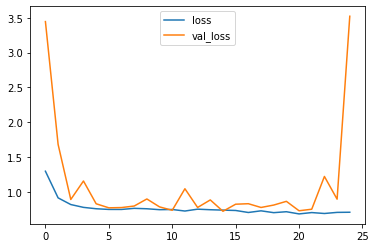

In [77]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])